# Evaluation score data

This notebooks calculates the average scores for the statements and plots a distribution graph of the scores by the participants. It uses an exported .csv from the survey from Qualtrics.

* _Input:_ Exported .csv from Qualtrics
* _Output:_ Static plots of the scores in .png format

**Tasks:** 
* Calculate average, mean, variance per statement
* Plots a distribution graph of all scores of all participants

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [12]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [13]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [14]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load the full CSV

In [15]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = '../evaluation-data/evaluation-session-statements.csv'

full_data = import_csv(file)

### Filter the relevant columns, remove all others

In [16]:
def reformat_dataframe(df):
    # Define the columns to keep
    columns_to_keep = [
        'Attitude towards_1',
        'Perceived ease_1',
        'Learnability of data_1',
        'Perceived usefulness_1',
        'Behavioural Intent_1'
    ]
    
    # Filter the DataFrame to keep only the specified columns
    filtered_data = df[columns_to_keep].copy()  # Make a copy to avoid SettingWithCopyWarning
    
    # Add a participant number column
    filtered_data.insert(0, 'Participant', ['P' + str(i + -1) for i in range(len(filtered_data))])
    
    # Rename the columns to S1, S2, etc.
    filtered_data.columns = ['Participant', 'S1', 'S2', 'S3', 'S4', 'S5']

        # Map word choices to numbers
    word_to_number = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}
    for col in filtered_data.columns[1:]:
        filtered_data[col] = filtered_data[col].map(word_to_number)

        # Remove the first three rows
    filtered_data = filtered_data.iloc[2:]
    
    return filtered_data


reformatted_df = reformat_dataframe(full_data)

# Display the reformatted DataFrame
print(reformatted_df.head())

  Participant   S1   S2   S3   S4   S5
2          P1  4.0  3.0  4.0  3.0  4.0
3          P2  4.0  2.0  4.0  4.0  4.0
4          P3  5.0  2.0  4.0  4.0  5.0
5          P4  3.0  2.0  4.0  4.0  4.0
6          P5  4.0  3.0  4.0  3.0  3.0


### Calculating the average for each statement

In [17]:
# Calculate the average score for each statement, excluding the 'Participant' column
average_scores = reformatted_df.drop(columns='Participant').mean()

# Display the average scores
print("Average Scores:")
print(average_scores)

Average Scores:
S1    4.0
S2    2.4
S3    4.0
S4    3.6
S5    4.0
dtype: float64


### Calculate the variance for each statement

In [18]:
# Calculate the average score for each statement, excluding the 'Participant' column
variance_scores = reformatted_df.drop(columns='Participant').var()

# Display the variance scores
print("Variance Scores:")
print(variance_scores)

Variance Scores:
S1    0.5
S2    0.3
S3    0.0
S4    0.3
S5    0.5
dtype: float64


### Calculate average score for each participant

In [19]:
# Calculate the average score for each participant
average_scores_per_participant = reformatted_df.drop(columns='Participant').mean(axis=1)

# Display the average scores per participant
print("Average Scores per Participant:")
print(average_scores_per_participant)

Average Scores per Participant:
2    3.6
3    3.6
4    4.0
5    3.4
6    3.4
dtype: float64


### Calculate variance for each participant

In [20]:
# Calculate the variance for each participant
variance_scores_per_participant = reformatted_df.drop(columns='Participant').var(axis=1)

# Display the variance scores per participant
print("Variance Scores per Participant:")
print(variance_scores_per_participant)

Variance Scores per Participant:
2    0.3
3    0.8
4    1.5
5    0.8
6    0.3
dtype: float64


### Plot the scores per participant by statement

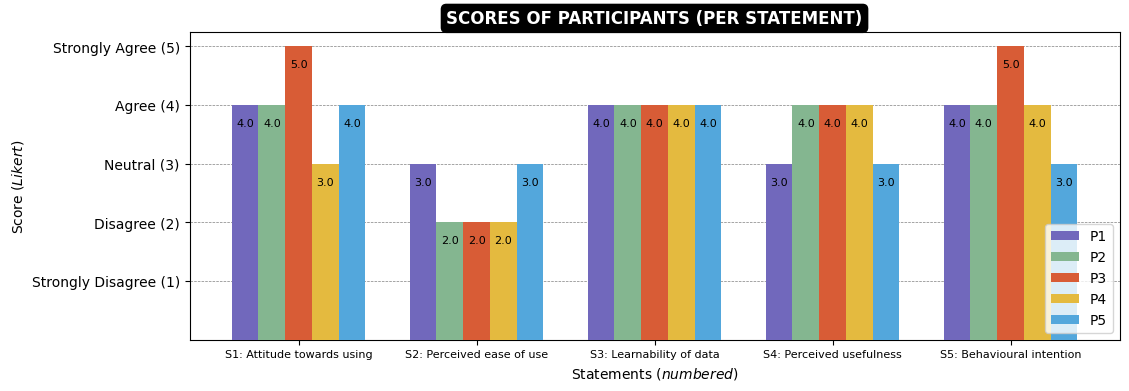

In [21]:
# Set custom colors for each participant
participant_colors = {
    'P1': '#7168bc',
    'P2': '#84b690',
    'P3': '#d85c36',
    'P4': '#e4ba3f',
    'P5': '#53a7dc'
}

# Define statement labels
statement_labels = {
    's1': 'S1: Attitude towards using',
    's2': 'S2: Perceived ease of use',
    's3': 'S3: Learnability of data',
    's4': 'S4: Perceived usefulness',
    's5': 'S5: Behavioural intention'
}

# Set the figure size
plt.figure(figsize=(12, 4))

# Define the width of each bar
bar_width = 0.15

# Add light grey lines for each score on the y-axis before plotting the bars
for y in range(1, 6):
    plt.axhline(y=y, color='grey', linestyle='--', linewidth=0.5, zorder=0)

# Iterate over each participant
for index, row in reformatted_df.iterrows():
    # Extract participant number and scores
    participant = row['Participant']
    scores = row[1:]  # Exclude the 'Participant' column
    
    # Plot the bar chart for the participant with custom color
    bars = plt.bar(np.arange(len(scores)) + (bar_width * index), scores, width=bar_width, label=participant, color=participant_colors.get(participant), zorder=3)
    
    # Add labels for each bar
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.4, str(scores[i]), fontsize=8, ha='center', va='bottom', zorder=4)

# Set title and labels
title = plt.title('Scores of participants (per statement)'.upper(), fontweight="bold" )
title.set_position([.5, 0.6])  # Adjust the title position
title.set_color('white')  # Set title text color to white
title.set_bbox(dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.3'))  # Set title background color to black
plt.xlabel('Statements (${numbered}$)')
plt.ylabel('Score (${Likert}$)')

# Set x-ticks and labels
statement_names = ['s1', 's2', 's3', 's4', 's5']
plt.xticks(np.arange(len(statement_names)) + (bar_width * (len(reformatted_df) + 3) / 2), [statement_labels[statement] for statement in statement_names], fontsize=8, ha='center')

# Set y-ticks and labels
y_ticks = ['Strongly Disagree (1)', 'Disagree (2)', 'Neutral (3)', 'Agree (4)', 'Strongly Agree (5)']
plt.yticks(np.arange(1, 6), y_ticks)

# Add legend at bottom right
plt.legend(loc='lower right')

# Save the chart to disk
plt.savefig('../evaluation-charts/statement-scores-per-statement.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Plot the scores per participant

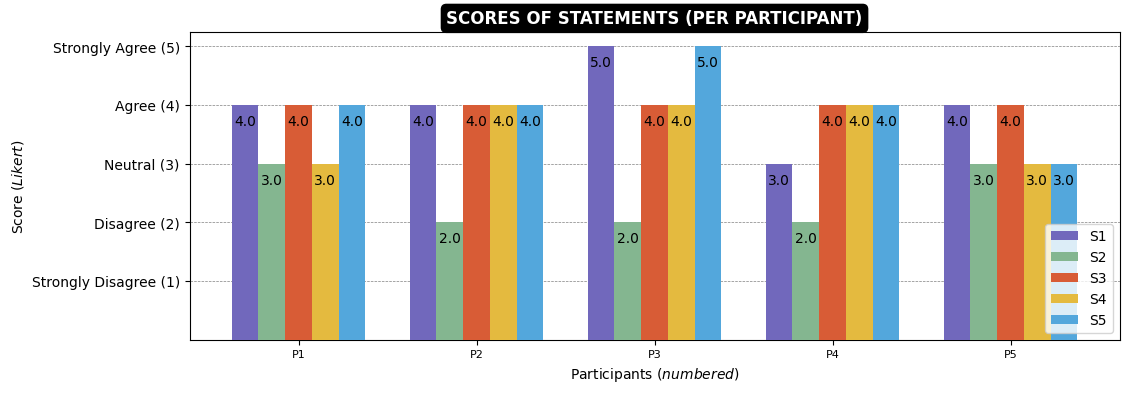

In [22]:
# Define the custom colors for each statement
colors = ['#7168bc', '#84b690', '#d85c36', '#e4ba3f', '#53a7dc']

# Define the mapping of original column names to new legend labels
legend_labels = {
    's1': 'S1: Attitude towards using',
    's2': 'S2: Perceived ease of use',
    's3': 'S3: Learnability of data',
    's4': 'S4: Perceived usefulness',
    's5': 'S5: Behavioural intention'
}

# Set the figure size
plt.figure(figsize=(12, 4))

# Add light grey lines for each score on the y-axis before plotting the bars
for y in range(1, 6):
    plt.axhline(y=y, color='grey', linestyle='--', linewidth=0.5, zorder=0)

# Define the width of each bar
bar_width = 0.15

# Iterate over each statement
for i, statement in enumerate(reformatted_df.columns[1:]):  # Exclude 'Participant' column
    # Extract scores for the statement
    scores = reformatted_df[statement]
    
    # Plot the bars for the statement with custom colors and labels
    plt.bar(np.arange(len(reformatted_df)) + (bar_width * i), scores, width=bar_width, 
            label=legend_labels.get(statement, statement), color=colors[i % len(colors)], zorder=3)
    
    # Add labels for each bar
    for j, score in enumerate(scores):
        plt.text(j + i * bar_width, score + -0.4, str(score), ha='center', va='bottom', zorder=4)

# Set title and labels
title = plt.title('Scores of statements (per participant)'.upper(), fontweight="bold")
title.set_position([.5, 0.6])  # Adjust the title position
title.set_color('white')  # Set title text color to white
title.set_bbox(dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.3'))  # Set title background color to black

# Add labels and title
plt.xlabel('Participants (${numbered}$)')
plt.ylabel('Score (${Likert}$)')

# Set x-ticks and labels
plt.xticks(np.arange(len(reformatted_df)) + (bar_width * (len(reformatted_df.columns[1:]) - 1)) / 2, reformatted_df['Participant'], fontsize=8, ha='center')

# Set y-ticks and labels
y_ticks = ['Strongly Disagree (1)', 'Disagree (2)', 'Neutral (3)', 'Agree (4)', 'Strongly Agree (5)']
plt.yticks(np.arange(1, 6), y_ticks)

# Add legend at bottom right
plt.legend(loc='lower right')

# Save the chart to disk
plt.savefig('../evaluation-charts/statement-scores-per-participant.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()